**1.Can you detect and classify defects in steel?**

**1.1.Loading Data**

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14241/862020/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1670773206&Signature=eKrvVRr8iYq3mTeSjnyb0qzCB4u45GSB4aexKhHJYhxNFAfcZk9NmzsHIdNQSqtSbFUAXwdMhUROS29GQce7AmXUvnAEvTrXZUbq8RFOd9oB7x4b9gYDSae7sMn8dpoOGohVOgV%2Bjwo6fSkOz7Z0dSufdsto9Yn71kNuKh%2BXgVTthbVTpz4CeJLgoJNVYFpZvyvFlBKIQHv7DKIgYQKhGF9sJ%2FzMGeZhLMsPoV31ywnX%2Fb4wzFCbT1o8%2BI77%2FaOa7q%2BLMaAMSnnk2y5iOgIKx7tn7S%2Bss9wAv%2FQg%2Bq6EnUSZzlQuojCbpM9n8NVx2gAjlMEeyTacmuOjiOlrbm0i7g%3D%3D&response-content-disposition=attachment%3B+filename%3Dseverstal-steel-defect-detection.zip" -c -O 'severstal-steel-defect-detection.zip'

--2022-12-09 17:50:08--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14241/862020/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1670773206&Signature=eKrvVRr8iYq3mTeSjnyb0qzCB4u45GSB4aexKhHJYhxNFAfcZk9NmzsHIdNQSqtSbFUAXwdMhUROS29GQce7AmXUvnAEvTrXZUbq8RFOd9oB7x4b9gYDSae7sMn8dpoOGohVOgV%2Bjwo6fSkOz7Z0dSufdsto9Yn71kNuKh%2BXgVTthbVTpz4CeJLgoJNVYFpZvyvFlBKIQHv7DKIgYQKhGF9sJ%2FzMGeZhLMsPoV31ywnX%2Fb4wzFCbT1o8%2BI77%2FaOa7q%2BLMaAMSnnk2y5iOgIKx7tn7S%2Bss9wAv%2FQg%2Bq6EnUSZzlQuojCbpM9n8NVx2gAjlMEeyTacmuOjiOlrbm0i7g%3D%3D&response-content-disposition=attachment%3B+filename%3Dseverstal-steel-defect-detection.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 142.250.107.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1684204253 (1.6G) [application/zip]
Saving to: ‘severstal-ste

**1.2.Business Problem:**

1.Steel is most important building material in modern times
and it is resistant natural and man-made wear which has made this material
most popular around the world.

2.Severstal is a leading steel mining and
production company and they want to identify steel defects using machine
learning techniques to improve automation increase efficiency and maintain
high quality products in their production lines.

3.Steel will undergo heating
rolling drying and cutting operations and we need to predict surface defects
on a steel sheet using machine learning techniques.

**1.3.Performance metric**

Mean Dice coefficient: It can be used to compare the pixel
wise segmentation between predicted segmentation and ground truth.
Formula is 2*|X ∩ Y | / |X+Y|. where X is predicted pixels and Y is ground
truth.

**1.4.Data Overview and source:**

Source:https://www.kaggle.com/competitions/severstal-steel-defect-detection/overview

Data files description:

train_images/ - folder of training images

test_images/ - folder of test images (we are segmenting and classifying these images)

train.csv - training annotations which provide segments for defects (ClassId = [1, 2, 3, 4])


In [ ]:
!unzip /content/severstal-steel-defect-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_images/99f75320d.jpg  
  inflating: train_images/99f9d2375.jpg  
  inflating: train_images/99fd3c6f5.jpg  
  inflating: train_images/9a016fe15.jpg  
  inflating: train_images/9a064450d.jpg  
  inflating: train_images/9a08c2783.jpg  
  inflating: train_images/9a18e4457.jpg  
  inflating: train_images/9a1f7c238.jpg  
  inflating: train_images/9a2523ce9.jpg  
  inflating: train_images/9a3e774ff.jpg  
  inflating: train_images/9a5e9e77c.jpg  
  inflating: train_images/9a5f7a855.jpg  
  inflating: train_images/9a62177bb.jpg  
  inflating: train_images/9a67575cf.jpg  
  inflating: train_images/9a6ac5406.jpg  
  inflating: train_images/9a70057c0.jpg  
  inflating: train_images/9a72fd89e.jpg  
  inflating: train_images/9a75974ba.jpg  
  inflating: train_images/9a762b892.jpg  
  inflating: train_images/9a7b2f3af.jpg  
  inflating: train_images/9a7b427b4.jpg  
  inflating: train_images/9a81a8056.jpg  
  inflating: train_images

**1.5.Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import matplotlib.patches as patches
import re
import random 
import pickle
import cv2
import seaborn as sns
from PIL import Image
import warnings
from collections import defaultdict
warnings.filterwarnings("ignore")

**1.6.Number of images in training and test data**

In [ ]:
#https://www.w3schools.com/python/ref_string_format.asp
count=0
for i in os.listdir("/content/train_images"):
    count+=1
print("Total number of train images are {0}".format(count))

Total number of train images are 12568


In [ ]:
#https://www.w3schools.com/python/ref_string_format.asp
count=0
for i in os.listdir("/content/test_images"):
    count+=1
print("Total number of test images are {0}".format(count))

Total number of test images are 5506


Observations:

Dataset has 12568 images in training data and 5506 images in test data

**1.7.Exploring detects**

In [ ]:
train_df=pd.read_csv("/content/train.csv")
train_df.head(5)

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [ ]:
defect1 = train_df[train_df['ClassId'] == 1].EncodedPixels.count()
defect2 = train_df[train_df['ClassId'] == 2].EncodedPixels.count()
defect3 = train_df[train_df['ClassId'] == 3].EncodedPixels.count()
defect4 = train_df[train_df['ClassId'] == 4].EncodedPixels.count()

print('There are {} defect1 images'.format(defect1))
print('There are {} defect2 images'.format(defect2))
print('There are {} defect3 images'.format(defect3))
print('There are {} defect4 images'.format(defect4))

There are 897 defect1 images
There are 247 defect2 images
There are 5150 defect3 images
There are 801 defect4 images


Observations:

1.train.csv - training annotations which provide segments for defects (ClassId = [1, 2, 3, 4])

2.Above csv file tells that there are four type of defects.

3.Each image may have no defects, a defect of a single class, or defects of multiple classes.

4.For each image we need to segment defects of each class (ClassId = [1, 2, 3, 4]).

5.The segment for each defect class will be encoded into a single row, even if there are several non-contiguous defect locations on an image.

6.In order to reduce the submission file size, metric uses run-length encoding on the pixel values.Instead of submitting an exhaustive list of indices for your segmentation, we will submit pairs of values that contain a start position and a run length. E.g. '1 3' implies starting at pixel 1 and running a total of 3 pixels (1,2,3).

7.The competition format requires a space delimited list of pairs. For example, '1 3 10 5' implies pixels 1,2,3,10,11,12,13,14 are to be included in the mask. The metric checks that the pairs are sorted, positive, and the decoded pixel values are not duplicated. The pixels are numbered from top to bottom, then left to right: 1 is pixel (1,1), 2 is pixel (2,1), etc.

**1.8.Checking for Data Imbalance**

In [ ]:
Image_id=[]
label=[]
train_folder_path='/content/train_images'
for i in os.listdir(train_folder_path): #https://www.geeksforgeeks.org/python-os-listdir-method/
    for j in range(1,5):
        Image_id.append(i)
        label.append(j)

x={'ImageId':Image_id,'ClassId':label}  #https://www.geeksforgeeks.org/creating-a-pandas-dataframe/
train_img=pd.DataFrame(x)
train_img.head(10)

,ImageId,ClassId
0,b49abc34a.jpg,1
1,b49abc34a.jpg,2
2,b49abc34a.jpg,3
3,b49abc34a.jpg,4
4,489bc785a.jpg,1
5,489bc785a.jpg,2
6,489bc785a.jpg,3
7,489bc785a.jpg,4
8,f4495532f.jpg,1
9,f4495532f.jpg,2


In [ ]:
#https://stackoverflow.com/questions/53645882/pandas-merging-10
df=pd.merge(train_img,train_df,how='outer',on=['ImageId','ClassId'])
df.fillna('',inplace=True)
df.head()

,ImageId,ClassId,EncodedPixels
0,b49abc34a.jpg,1,
1,b49abc34a.jpg,2,
2,b49abc34a.jpg,3,
3,b49abc34a.jpg,4,
4,489bc785a.jpg,1,


Observations:

In the above table we merge the train.csv file with train images to separate images with defects and with out defects or images with masks or with out masks

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/03/pivot-table-pandas-python/
train=pd.pivot_table(df,values='EncodedPixels',index='ImageId',columns='ClassId',aggfunc=np.sum).astype(str)
train=train.reset_index()
train.columns=['image_id','rle_1','rle_2','rle_3','rle_4'] 
train.head()

,image_id,rle_1,rle_2,rle_3,rle_4
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,
1,00031f466.jpg,,,,
2,000418bfc.jpg,,,,
3,000789191.jpg,,,,
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,


In [ ]:
defect=[]
stratify=[]
for i in range(len(train)):
  if (train['rle_1'][i] != '' or train['rle_2'][i] != '' or train['rle_3'][i] != '' or train['rle_4'][i] != ''):
    defect.append(1)
  else:
    defect.append(0)
  
  if train['rle_1'][i] != '':
    stratify.append(1)
  elif train['rle_2'][i] != '':
    stratify.append(2)
  elif train['rle_3'][i] != '':
    stratify.append(3)
  elif train['rle_4'][i] != '':
    stratify.append(4)
  else:
    stratify.append(0)
train['defect']=defect
train['stratify']=stratify

In [ ]:
train.head()

,image_id,rle_1,rle_2,rle_3,rle_4,defect,stratify
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,,1,1
1,00031f466.jpg,,,,,0,0
2,000418bfc.jpg,,,,,0,0
3,000789191.jpg,,,,,0,0
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,,1,3


In [ ]:
defect_1,defect_2,defect_3,defect_4=[],[],[],[]
for i in range(len(train)):
  if train['rle_1'][i] != '':
    defect_1.append(1)
  else:
    defect_1.append(0)
  if train['rle_2'][i] != '':
    defect_2.append(1)
  else:
    defect_2.append(0)
  if train['rle_3'][i] != '':
    defect_3.append(1)
  else:
    defect_3.append(0)
  if train['rle_4'][i] != '':
    defect_4.append(1)
  else:
    defect_4.append(0)
train['defect_1']=defect_1
train['defect_2']=defect_2
train['defect_3']=defect_3
train['defect_4']=defect_4
train['total_defects']=train['defect_1']+ train['defect_2']+ train['defect_3']+ train['defect_4']
train.head()

,image_id,rle_1,rle_2,rle_3,rle_4,defect,stratify,defect_1,defect_2,defect_3,defect_4,total_defects
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,,1,1,1,0,0,0,1
1,00031f466.jpg,,,,,0,0,0,0,0,0,0
2,000418bfc.jpg,,,,,0,0,0,0,0,0,0
3,000789191.jpg,,,,,0,0,0,0,0,0,0
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,,1,3,0,0,1,0,1


In [ ]:
train.to_pickle("./train.pkl")

In [ ]:
test_image=[i for i in os.listdir('/content/test_images')]

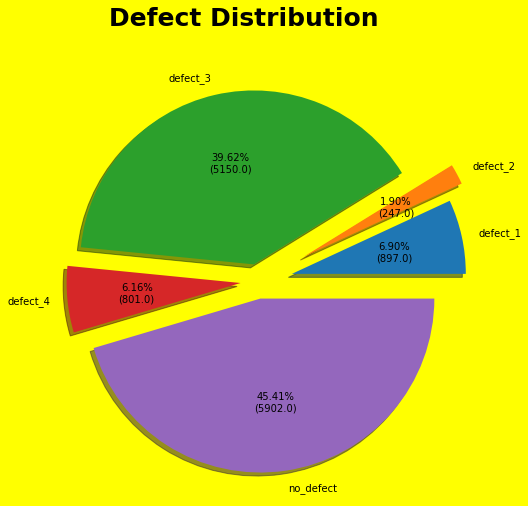

In [ ]:
#https://www.askpython.com/python/plot-customize-pie-chart-in-python
defect_1,defect_2,defect_3,defect_4,no_defect=0,0,0,0,0
def func(v,p): #https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
  a=p*sum(v)/100
  return "{:.2f}%\n({:.1f})".format(p,a)
for i in range(len(train)):
  if train['rle_1'][i] != '':
    defect_1+=1
  if train['rle_2'][i] != '':
    defect_2+=1
  if train['rle_3'][i] != '':
    defect_3+=1
  if train['rle_4'][i] != '':
    defect_4+=1
  if train['defect'][i] == 0:
    no_defect+=1
labels=['defect_1','defect_2','defect_3','defect_4','no_defect']
sizes=[defect_1,defect_2,defect_3,defect_4,no_defect]
explode=(0.2,0.3,0.1,0.1,0.1)
fig,ax=plt.subplots(figsize=(16,8))
ax.pie(sizes,explode=explode,labels=labels,textprops={'fontsize': 10},autopct=lambda p: func(sizes,p),shadow=True)
fig.suptitle('Defect Distribution',fontsize=25,fontweight='bold')
fig.set_facecolor("yellow")
plt.show()

Observations:

1.There are almost good balance between images with defects and with out defects.

2.Data is very imbalanced because defect-3 has majority and defects-2 has minority.

3.We will need to data augmentation techniques to classify the defects.

In [ ]:
def patch1(bar,ax):
  #https://stackoverflow.com/questions/52080991/display-percentage-above-bar-chart-in-matplotlib
  for p in bar.patches: 
     width=p.get_width()
     height=p.get_height()
     x,y=p.get_xy() 
     ax.annotate('{}'.format(height),(x+width/2,y+height*1.02),ha='center',fontsize=14)

**1.9.Number of defects per images**

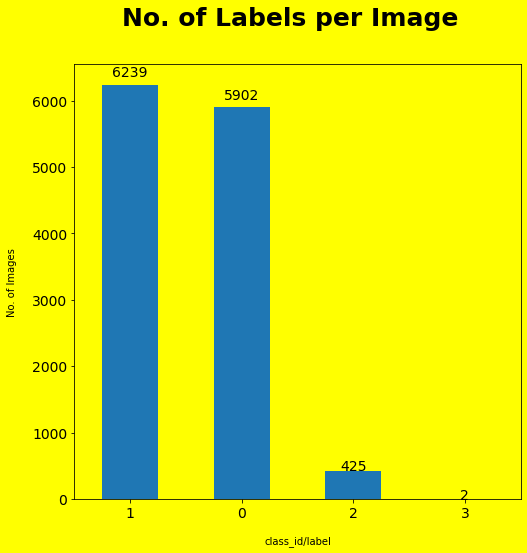

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
a=train['total_defects'].value_counts().plot(kind='bar')
patch1(a,ax) 
ax.set_xlabel("class_id/label",fontsize=10,labelpad=15)
ax.set_ylabel("No. of Images",fontsize=10,labelpad=15)
plt.xticks(rotation='horizontal',fontsize=14)
plt.yticks(fontsize=14)
fig.suptitle('No. of Labels per Image',fontsize=25,fontweight='bold')
ax.set_facecolor("yellow")
fig.set_facecolor("yellow")
plt.show()

Observations:

1.Majority of the images contain only one defect.

2.Maximum defects in images are 3 so this means we have images with multiple types of defects.

3.There are half of images which has no defects.

In [ ]:
test_folder_path='/content/test_images'

**1.10.Plotting images with masks**

In [ ]:
#https://www.kaggle.com/paulorzp/rle-functions-run-lenght-encode-decode
def rle_to_mask(rle):
    # CONVERT RLE TO MASK 
    if (pd.isnull(rle))|(rle=='')|(rle=='-1'): 
        return np.zeros((256,800) ,dtype=np.uint8)
    
    height= 256
    width = 1600
    mask= np.zeros( width*height ,dtype=np.uint8)

    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]-1
    lengths = array[1::2]    
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])]=1
    
    return mask.reshape((height,width),order='F')

In [ ]:
def plot_mask(rle_defect,k):
  x=rle_defect.columns[2]
  train_folder_path='/content/train_images/'
  # Create figure and axes
  fig,ax=plt.subplots(4,2,figsize=(8,8))
  fig.suptitle('Defect_'+str(k)+'_Images',fontsize=20,fontweight='bold')
  for i in range(4):
    image_id=rle_defect['image_id'][i]
    rle=rle_defect[x][i]
    im=Image.open(train_folder_path+str(image_id))
    ax[i,0].imshow(im)
    ax[i,0].set_title(image_id)
    mask=rle_to_mask(rle)
    ax[i,1].imshow(mask)
    ax[i,1].set_title("Mask for "+str(image_id))
  fig.set_facecolor("yellow")
  plt.show()

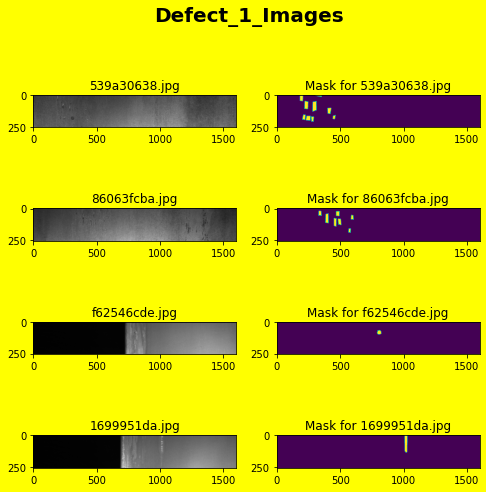

In [ ]:
rle_defect=train[train['defect_1']==1]
rle_defect=rle_defect[['image_id','rle_1']]
rle_defect=rle_defect.sample(n=4) 
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,1)

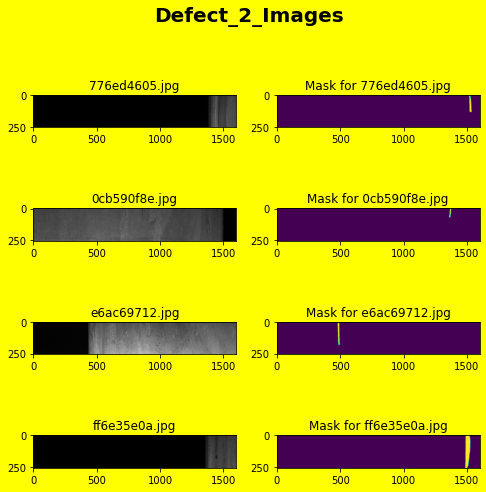

In [ ]:
rle_defect=train[train['defect_2']==1]
rle_defect=rle_defect[['image_id','rle_2']]
rle_defect=rle_defect.sample(n=4) 
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,2)

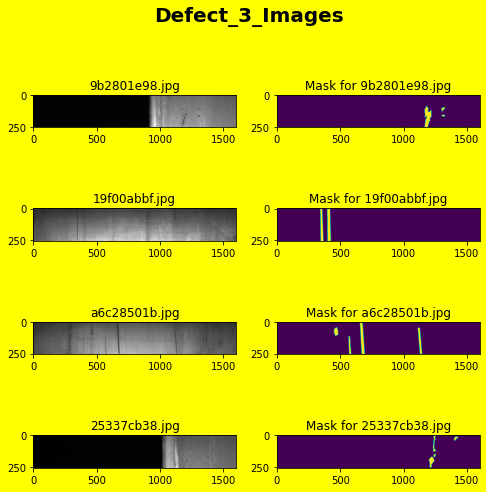

In [ ]:
rle_defect=train[train['defect_3']==1]
rle_defect=rle_defect[['image_id','rle_3']]
rle_defect=rle_defect.sample(n=4) 
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,3)

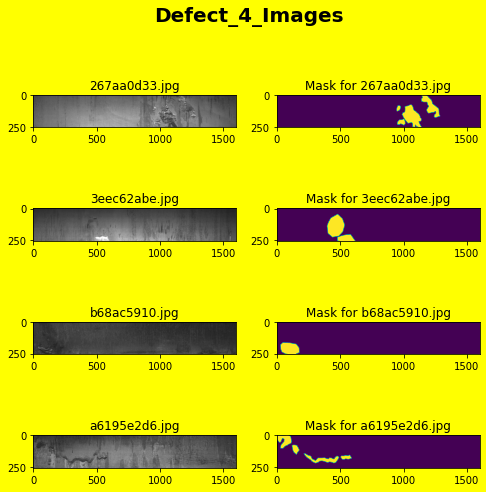

In [ ]:
rle_defect=train[train['defect_4']==1]
rle_defect=rle_defect[['image_id','rle_4']]
rle_defect=rle_defect.sample(n=4) 
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,4)

**1.11.Visualize mask areas**

In [ ]:
#https://www.kaggle.com/code/aleksandradeis/steel-defect-detection-eda/notebook
def get_mask(line_id):
    '''
    Function to visualize the image and the mask.
    INPUT:
        line_id - id of the line to visualize the masks
    RETURNS:
        np_mask - numpy segmentation map
    '''
    
    # convert rle to mask
    rle = train_df.loc[line_id]['EncodedPixels']
    
    np_mask = rle_to_mask(rle)
    np_mask = np.clip(np_mask, 0, 1)
        
    return np_mask

def add_mask_areas(train_df):
    '''
    Helper function to add mask area as a new column to the dataframe
    INPUT:
        train_df - dataset with training labels
    '''
    masks_df = train_df.copy()
    masks_df['Area'] = 0
        
    for i, row in masks_df.iterrows():
        masks_df['Area'].loc[i] = np.sum(get_mask(i))
    
    return masks_df

In [ ]:
masks_df = add_mask_areas(train_df)

In [ ]:
masks_df

,ImageId,ClassId,EncodedPixels,Area
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,4396
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...,6897
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...,8319
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...,69357
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...,4851
...,...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...,8903
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...,7206
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...,2336
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...,23503


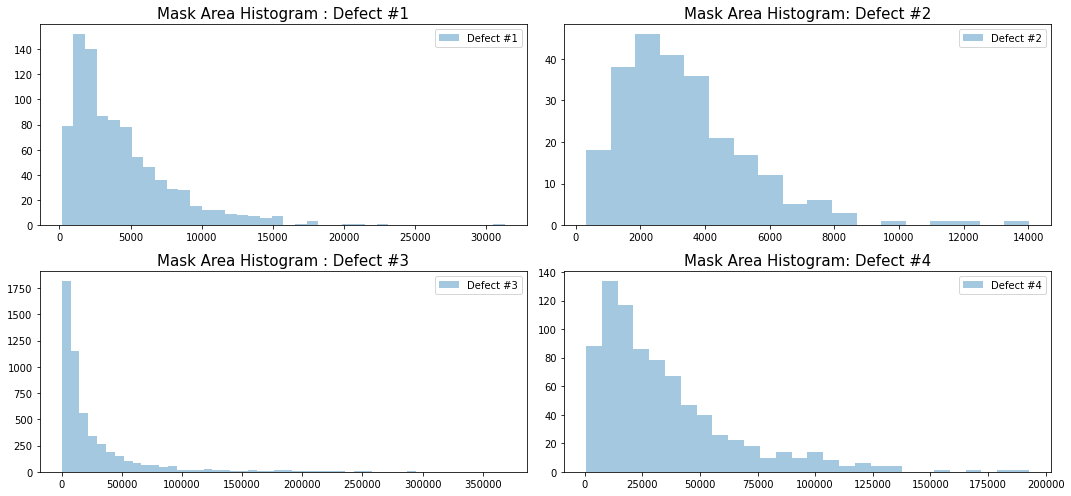

In [ ]:
# Plot Histograms and KDE plots
plt.figure(figsize=(15,7))

plt.subplot(221)
sns.distplot(masks_df[masks_df['ClassId'] == 1]['Area'].values, kde=False, label='Defect #1')
plt.legend()
plt.title('Mask Area Histogram : Defect #1', fontsize=15)

plt.subplot(222)
sns.distplot(masks_df[masks_df['ClassId'] == 2]['Area'].values, kde=False, label='Defect #2')
plt.legend()
plt.title('Mask Area Histogram: Defect #2', fontsize=15)

plt.subplot(223)
sns.distplot(masks_df[masks_df['ClassId'] == 3]['Area'].values, kde=False, label='Defect #3')
plt.legend()
plt.title('Mask Area Histogram : Defect #3', fontsize=15)

plt.subplot(224)
sns.distplot(masks_df[masks_df['ClassId'] == 4]['Area'].values, kde=False, label='Defect #4')
plt.legend()
plt.title('Mask Area Histogram: Defect #4', fontsize=15)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Mask Area KERNEL DENSITY ESTIMATION Plot')

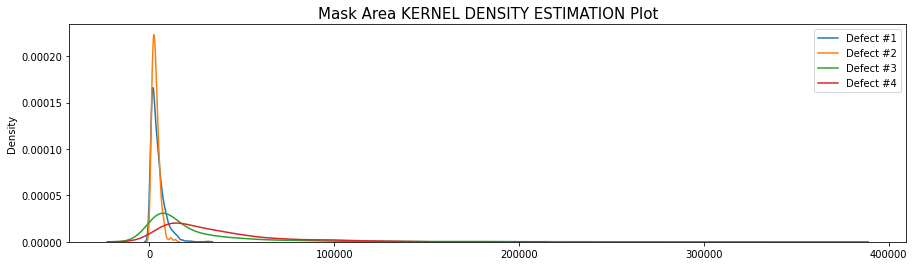

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(111)
sns.kdeplot(masks_df[masks_df['ClassId'] == 1]['Area'].values, label='Defect #1')
sns.kdeplot(masks_df[masks_df['ClassId'] == 2]['Area'].values, label='Defect #2')
sns.kdeplot(masks_df[masks_df['ClassId'] == 3]['Area'].values, label='Defect #3')
sns.kdeplot(masks_df[masks_df['ClassId'] == 4]['Area'].values, label='Defect #4')
plt.legend()

plt.title('Mask Area KERNEL DENSITY ESTIMATION Plot', fontsize=15)

Observations:

1.Kernel density estimation plot clearly indicating that large mask areas are clearly classifying defect 3.

2.Defect 2 has lower mask areas because this is minority defect.

In [ ]:
masks_df.head(2)

,ImageId,ClassId,EncodedPixels,Area
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,4396
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...,6897


In [ ]:
def plot_image_grid(df, n_images = 5):
    
    fig, axs = plt.subplots(n_images, 2, figsize=(20, 10))
    
    for i in range(n_images):
        image_id = np.random.randint(0,len(df),1)[0]

        image = Image.open(train_folder_path + '/'+df.iloc[image_id]['ImageId'])
        mask = rle_to_mask(df.iloc[image_id]['EncodedPixels'])
        
        defect = df.iloc[image_id]['ClassId']

        axs[i,0].imshow(image)
        axs[i,0].axis('off')
        axs[i,0].set_title('Original Image')

        axs[i, 1].imshow(image)
        axs[i, 1].imshow(mask, alpha = 0.5, cmap = "Reds")
        axs[i, 1].axis('off')
        axs[i, 1].set_title('Mask with defect #{}'.format(defect))

    plt.suptitle('Images with defect masks')

**1.12.Visualizing Large Areas**

In [ ]:
large_masks_df = masks_df[masks_df['Area'] > 150000]

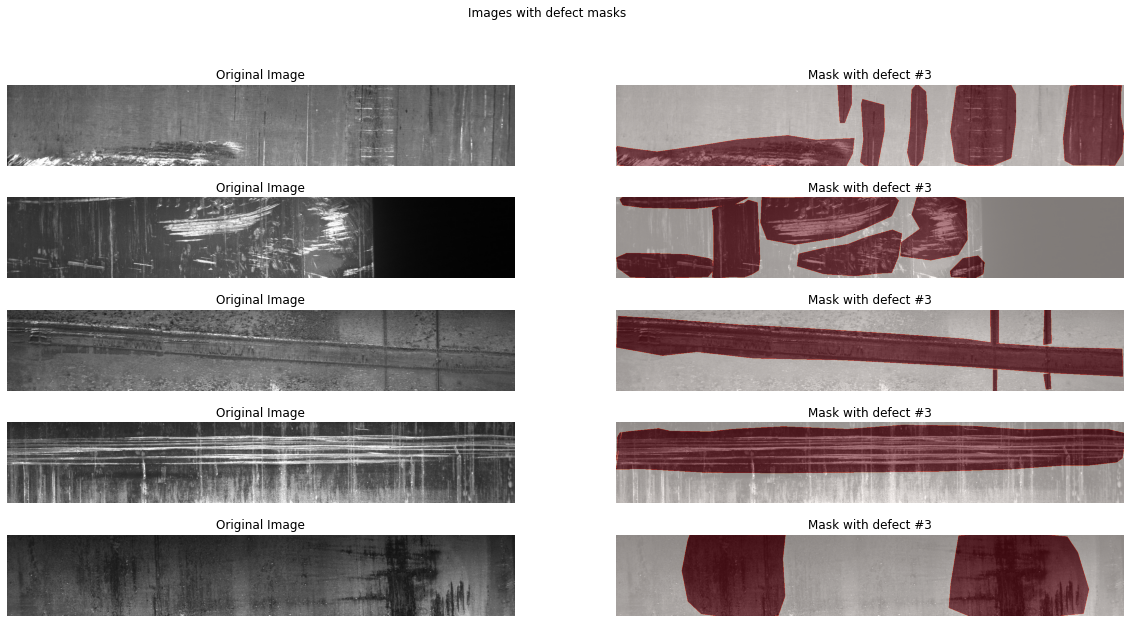

In [ ]:
# plot a grid of images with large masks
plot_image_grid(large_masks_df, n_images = 5)

Observations:

Images with large mask areas mostly are with defect 3.